# Web Mining Digital Assignment

Domain: Facebook

### Classification

Step 1: Import statements

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Step 2: Define functions

In [2]:
from sklearn.datasets import load_files

In [3]:
def load_train_data():
  
  train_data = pd.read_csv('train.csv', header=0)

  X_train = train_data.drop(columns='fake')
  Y_train = train_data['fake']

  return X_train, Y_train

In [4]:
def load_test_data():

  test_data = pd.read_csv('test.csv', header=0)

  X_test = test_data.drop(columns='fake')
  Y_test = test_data['fake']

  return X_test, Y_test

In [5]:
from sklearn.model_selection import cross_validate


def get_classifier_cv_score(model, X, y, scoring='accuracy', cv=7):
    
    scores = cross_validate(model, X, y, cv=cv, scoring=scoring, return_train_score=True)
    train_scores = scores['train_score']
    val_scores = scores['test_score']
    
    train_mean = np.mean(train_scores)
    val_mean = np.mean(val_scores)
    
    return train_mean, val_mean

In [6]:
def print_grid_search_result(grid_search):
    
    print(grid_search.best_params_)
    
    best_train = grid_search.cv_results_["mean_train_score"][grid_search.best_index_]
    print("best mean_train_score: {:.3f}".format(best_train))
        
    best_test = grid_search.cv_results_["mean_test_score"][grid_search.best_index_]
    print("best mean_test_score: {:.3f}".format(best_test))

Step 3: Call function to load data

In [7]:
X_data, y_data = load_train_data()
print(X_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 49.6 KB
None


In [8]:
X_data.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows
0,1,0.27,0,0.0,0,53,0,0,32,1000,955
1,1,0.00,2,0.0,0,44,0,0,286,2740,533
2,1,0.10,2,0.0,0,0,0,1,13,159,98
3,1,0.00,1,0.0,0,82,0,0,679,414,651
4,1,0.00,2,0.0,0,0,0,1,6,151,126


In [9]:
print("Size: ",X_data.shape, ", Type: ", type(X_data))
print("Size: ",y_data.shape, ", Type: ", type(y_data))

Size:  (576, 11) , Type:  <class 'pandas.core.frame.DataFrame'>
Size:  (576,) , Type:  <class 'pandas.core.series.Series'>


Step 4: Inspect the data

We're going to check if there are any missing values in this dataset

In [10]:
print(X_data.isnull().sum())

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
dtype: int64


There are no missing values, thus the dataset does not need to be modified

Step 5: Create test and train datasets

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=37)

In [12]:
print(X_train.shape)
print(y_train.shape)

(460, 11)
(460,)


Step 6: Compare models using Cross Validation

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

model_list = [LogisticRegression(max_iter=600),
              SVC(), 
              GaussianNB(),
              RandomForestClassifier(random_state=55),
              GradientBoostingClassifier(random_state=56)]

train_scores = []
val_scores = []

for model in model_list:
    train, val = get_classifier_cv_score(model, X_train, y_train,'average_precision')
    train_scores.append(train)
    val_scores.append(val)
    
models_score = sorted(list(zip(val_scores, train_scores, model_list)), reverse=True)

print("-------------------------------------")
for val, train, model in models_score:
    print("Model: {} ".format(model.__class__.__name__))

    print("train_score: {:.3f}".format(train)) 

    print("validation_score: {:.3f}".format(val)) 

    print("-------------------------------------")

-------------------------------------
Model: RandomForestClassifier 
train_score: 1.000
validation_score: 0.984
-------------------------------------
Model: GradientBoostingClassifier 
train_score: 1.000
validation_score: 0.979
-------------------------------------
Model: LogisticRegression 
train_score: 0.981
validation_score: 0.975
-------------------------------------
Model: SVC 
train_score: 0.929
validation_score: 0.928
-------------------------------------
Model: GaussianNB 
train_score: 0.804
validation_score: 0.821
-------------------------------------


Clearly, the two best models are RandomForestClassifier and GradientBoostingClassifier. Thus, we are going to use these two models.

Step 7: Hyperparameter Tuning Using Grid Search

Step 7.1: Grid Search for RandomForestClassifier.

In [14]:
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier(random_state=55)

parameters = {'n_estimators': [300, 500, 700, 1000],
              'max_depth': [7, 9, 11, 13]}

grid1 = GridSearchCV(model, parameters, cv=7, scoring='average_precision',return_train_score=True)

In [15]:
grid1.fit(X_train, y_train)

GridSearchCV(cv=7, estimator=RandomForestClassifier(random_state=55),
             param_grid={'max_depth': [7, 9, 11, 13],
                         'n_estimators': [300, 500, 700, 1000]},
             return_train_score=True, scoring='average_precision')

In [16]:
print_grid_search_result(grid1)

{'max_depth': 7, 'n_estimators': 700}
best mean_train_score: 1.000
best mean_test_score: 0.985


Step 7.2: Grid Search for Gradient Boosting Classifier.

In [17]:
model = GradientBoostingClassifier(max_depth=5, random_state=56)

parameters = {'n_estimators': [50, 100, 200],
              'learning_rate': [0.001, 0.01, 0.1, 1.0, 10.0]}

grid2 = GridSearchCV(model, parameters, cv=7, scoring='average_precision', return_train_score=True)

In [18]:
grid2.fit(X_train, y_train)

GridSearchCV(cv=7,
             estimator=GradientBoostingClassifier(max_depth=5, random_state=56),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1.0, 10.0],
                         'n_estimators': [50, 100, 200]},
             return_train_score=True, scoring='average_precision')

In [19]:
print_grid_search_result(grid2)

{'learning_rate': 1.0, 'n_estimators': 50}
best mean_train_score: 1.000
best mean_test_score: 0.981


Step 8: Making predictions

RandomForestClassifier performed better than Gradient Boosting Classifier, thus, we are going to use that to perform classification.

In [20]:
clf=RandomForestClassifier(n_estimators=700)

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [21]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9224137931034483
Precision: 0.9333333333333333
Recall: 0.9180327868852459


### Clustering

Step 1: Import statements

In [22]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

Step 2: Use PCA (Principal Component Analysis) to reduce the dimensionality of the data, to give us two columns to work with.

In [23]:
X_data_PCA = PCA(n_components=2).fit_transform(X_data)
X_data_PCA

array([[-8.43072510e+04,  4.41895488e+02],
       [-8.25672102e+04,  3.40655592e+01],
       [-8.51482441e+04, -4.15354307e+02],
       ...,
       [-8.52112481e+04, -1.75194773e+02],
       [-8.52502456e+04, -4.40911200e+02],
       [-8.51572500e+04, -2.75215327e+01]])

Step 3: Make prediction using KMeans and the PCA-fitted data

In [24]:
km=KMeans(n_clusters=2, random_state=0)
y_cluster_predicted = km.fit_predict(X_data_PCA)
y_cluster_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Step 4: Display the cluster centers

In [25]:
km.cluster_centers_

array([[-5.97236346e+04,  1.69786022e+00],
       [ 1.14072142e+07, -3.24291302e+02]])

Step 5: Visualize the clusters.

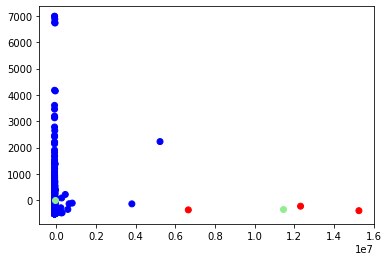

In [26]:
plt_y = ["blue" if x == 0 else "red" for x in y_cluster_predicted]
plt.scatter(X_data_PCA[:,0], X_data_PCA[:,1], c=plt_y)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], c='lightgreen')